In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings

In [66]:

sns.set(style="whitegrid")
filterwarnings('ignore')


In [67]:

file_path = 'data/raw_data.csv'


In [68]:
data = pd.read_csv(file_path)

In [69]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [70]:

# Analyze missing data
missing_data = data.isnull().mean().sort_values(ascending=False) * 100
print("Missing Data Percentage:\n", missing_data.head(10))

Missing Data Percentage:
 Defect_of_vehicle          35.945112
Service_year_of_vehicle    31.893472
Work_of_casuality          25.966223
Fitness_of_casuality       21.394933
Type_of_vehicle             7.713543
Types_of_Junction           7.202014
Driving_experience          6.731082
Educational_level           6.016564
Vehicle_driver_relation     4.701202
Owner_of_vehicle            3.913608
dtype: float64


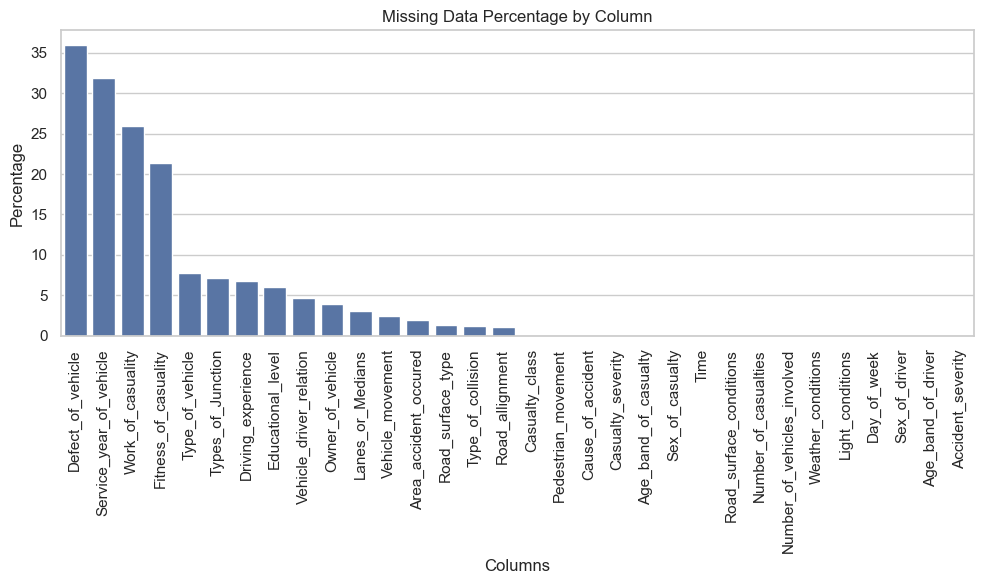

In [71]:
# Plot missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.title('Missing Data Percentage by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

In [72]:
threshold = 20  # Percentage threshold
columns_to_drop = missing_data[missing_data > threshold].index
data_cleaned = data.drop(columns=columns_to_drop)



In [73]:

# Analyze missing data
missing_data = data_cleaned.isnull().mean().sort_values(ascending=False) * 100
print("Missing Data Percentage:\n", missing_data.head(10))

Missing Data Percentage:
 Type_of_vehicle            7.713543
Types_of_Junction          7.202014
Driving_experience         6.731082
Educational_level          6.016564
Vehicle_driver_relation    4.701202
Owner_of_vehicle           3.913608
Lanes_or_Medians           3.126015
Vehicle_movement           2.500812
Area_accident_occured      1.940565
Road_surface_type          1.396557
dtype: float64


In [75]:
# Fill missing values
for column in data_cleaned.columns:
    if data_cleaned[column].dtype in ["int64", "float64"]:  # For numerical columns
        data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)
    elif data_cleaned[column].dtype == "object":  # For categorical columns
        data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)

In [76]:
print("\nMissing Data After Filling:\n", data_cleaned.isnull().sum())



Missing Data After Filling:
 Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64


In [77]:

# Summary statistics for numerical columns
numerical_summary = data_cleaned.describe()
print("Numerical Summary")
numerical_summary.T

Numerical Summary


,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [78]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

In [79]:
# Correlation matrix for numerical features
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data_cleaned[numerical_columns].corr()

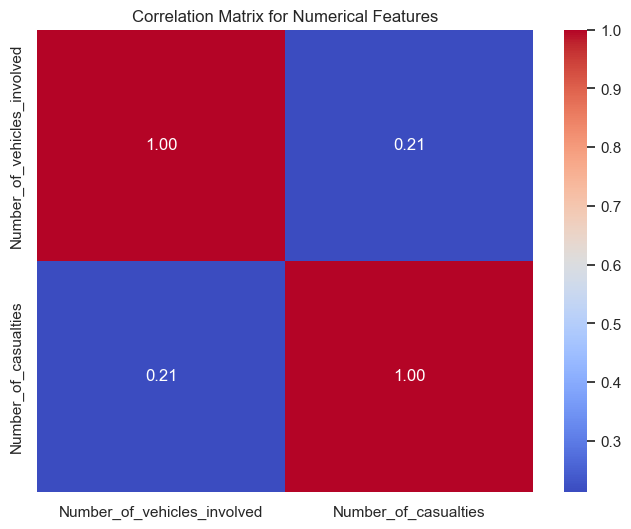

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [81]:
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

In [82]:
categorical_columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [83]:
# Unique values for categorical columns
unique_values = data_cleaned[categorical_columns].nunique().sort_values(ascending=False)
print("Unique Values for Categorical Columns:\n")

unique_values_df = pd.DataFrame(unique_values, columns=['Unique Values'])
unique_values_df

Unique Values for Categorical Columns:



,Unique Values
Time,1074
Cause_of_accident,20
Type_of_vehicle,17
Area_accident_occured,14
Vehicle_movement,13
Type_of_collision,10
Weather_conditions,9
Pedestrian_movement,9
Road_allignment,9
Types_of_Junction,8


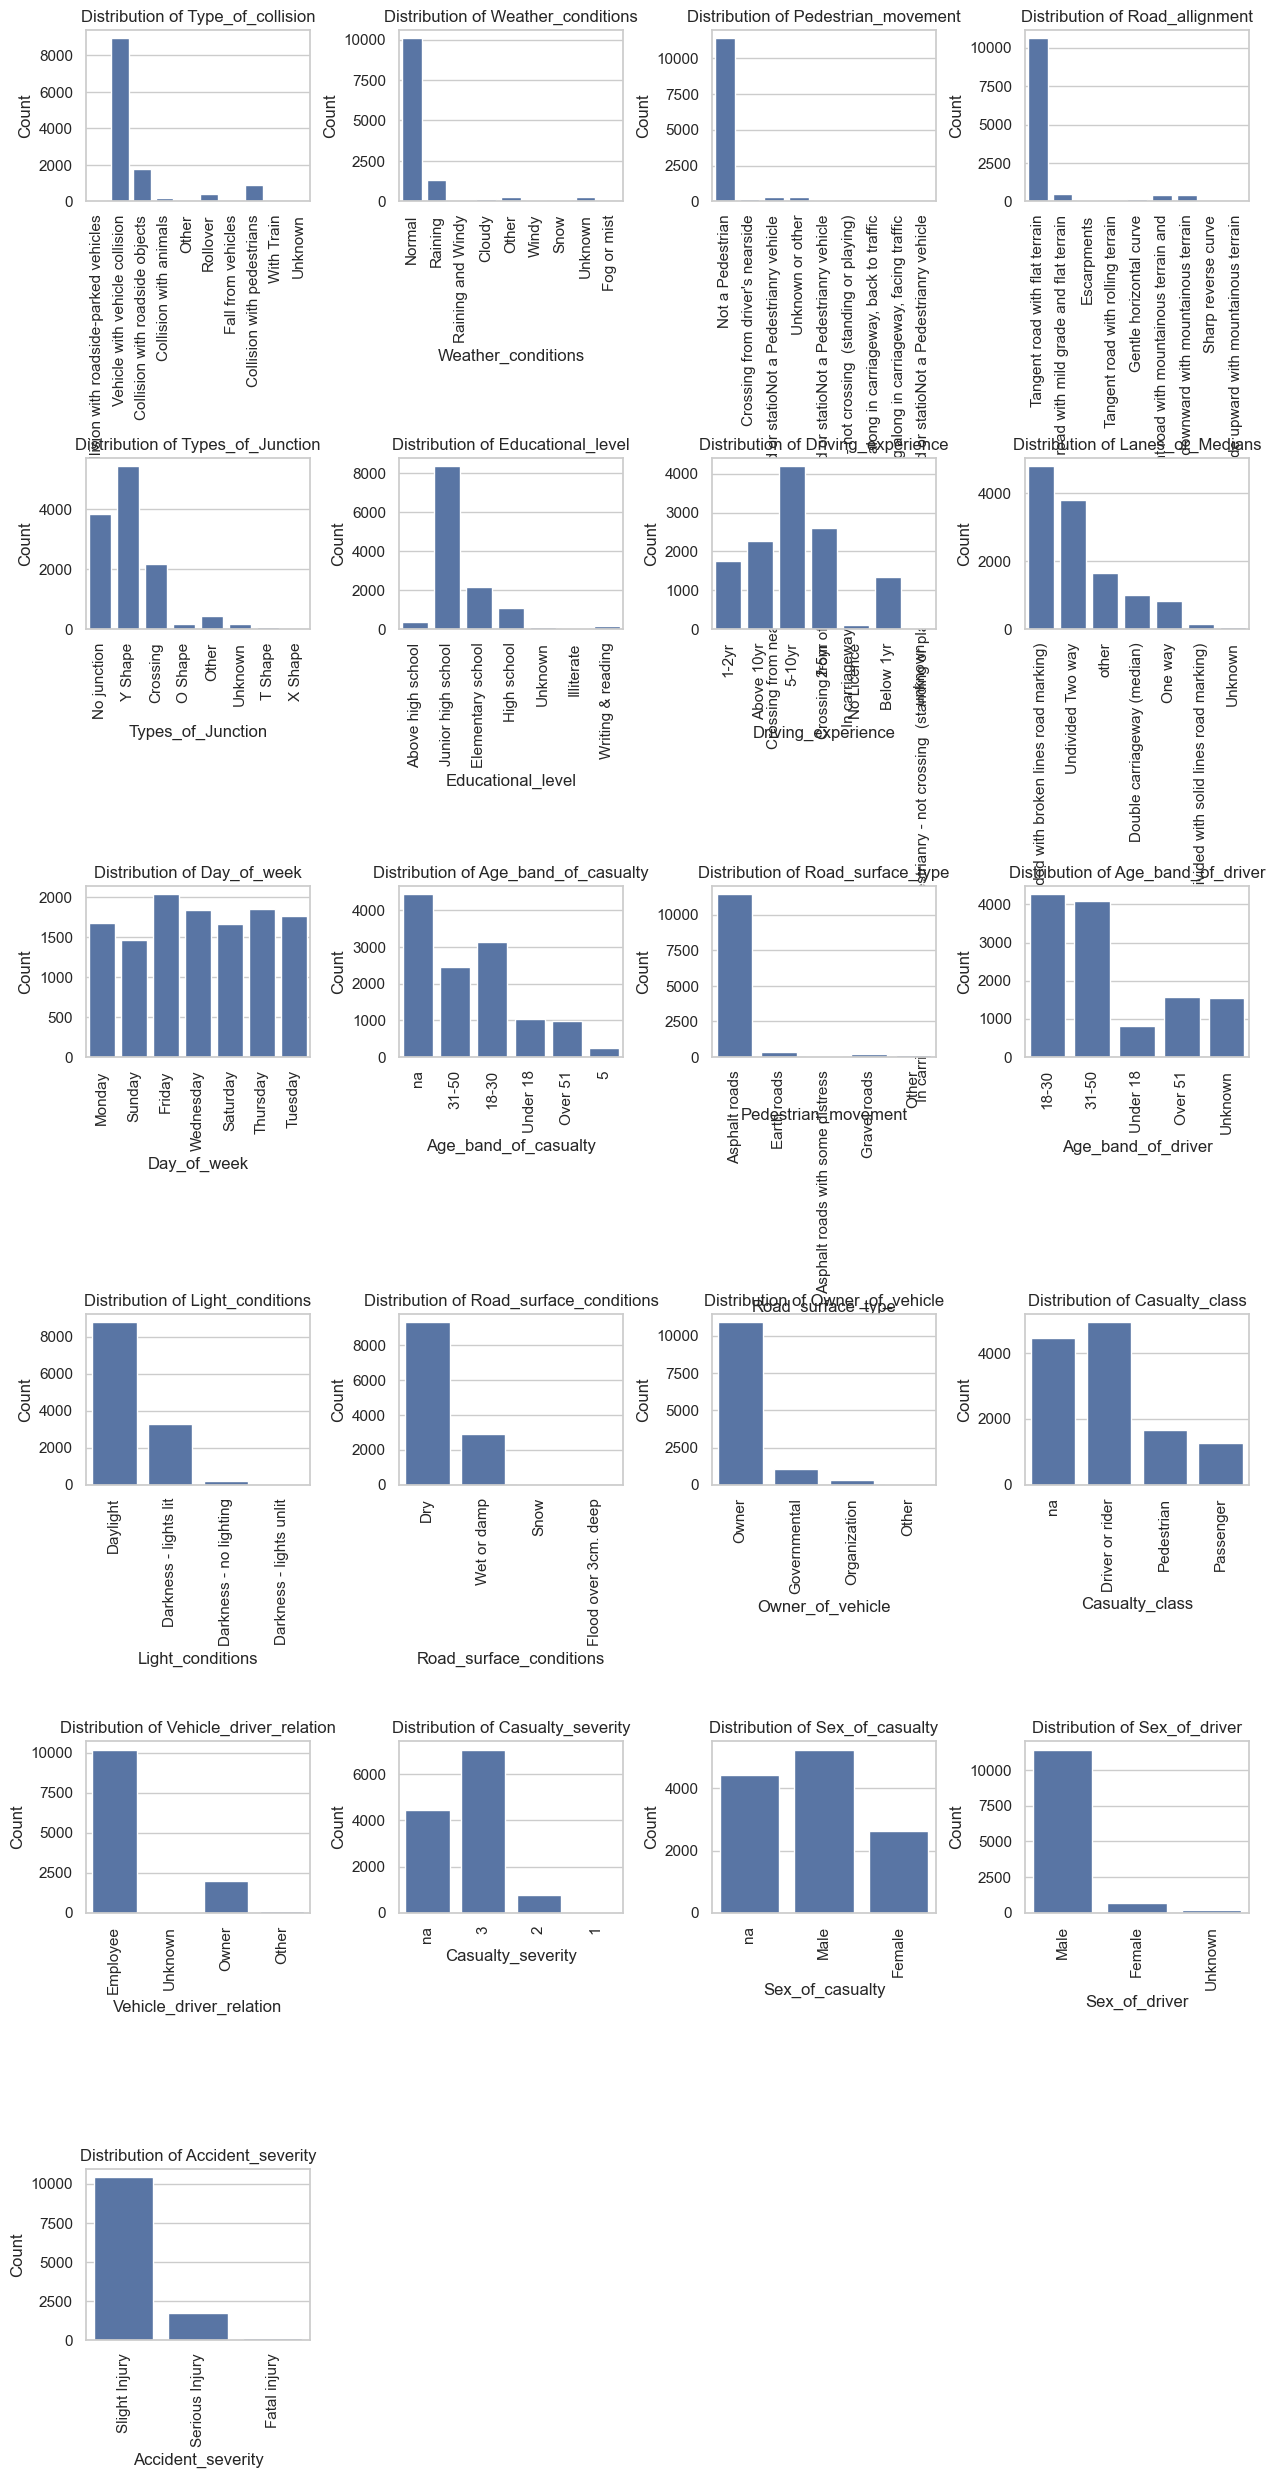

In [94]:
# Filter columns with unique values <= 10
columns_to_plot = unique_values[unique_values <= 10].index

# Plot count plots for these columns
num_plots = len(columns_to_plot)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for ax, col in zip(axes, columns_to_plot):
    sns.countplot(data=data_cleaned, x=col, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)


# Remove any unused axes
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=1.5, wspace=0.4)
plt.tight_layout()
plt.show()

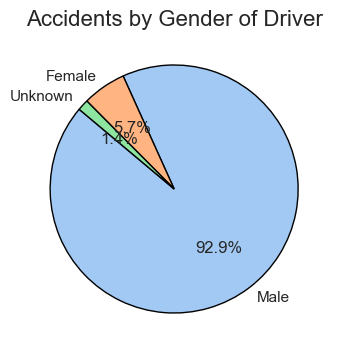

In [113]:
# Draw pie chart for Gender of Driver
gender_counts = data_cleaned['Sex_of_driver'].value_counts()
plt.figure(figsize=(4,6))
colors = sns.color_palette('pastel')[0:len(gender_counts)]
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Accidents by Gender of Driver', fontsize=16)
plt.show()

### Gender Disparity:

Male drivers are overwhelmingly involved in accidents compared to females, highlighting potential behavioral or exposure differences. This disparity could be due to a variety of factors, including:

1. **Driving Behavior**: Males may exhibit more aggressive driving behaviors, such as speeding, tailgating, and overtaking, which can increase the likelihood of accidents.

2. **Risk-Taking Tendencies**: Males are generally more likely to take risks while driving, including driving under the influence of alcohol or drugs, not wearing seat belts, and engaging in distracted driving.

3. **Exposure Differences**: Males may spend more time driving compared to females, either due to occupational requirements or personal preferences, leading to higher exposure to potential accidents.


Understanding these differences is crucial for developing targeted interventions to improve road safety for all drivers. This can include:

- **Education and Awareness Campaigns**: Promoting safe driving practices and raising awareness about the risks associated with aggressive and risky driving behaviors.
- **Enforcement of Traffic Laws**: Strengthening the enforcement of traffic laws, such as speed limits, seat belt usage, and DUI regulations.
- **Driver Training Programs**: Implementing driver training programs that focus on defensive driving techniques and risk management.
- **Vehicle Safety Improvements**: Encouraging the use of safer vehicles equipped with advanced safety features.
- **Policy Interventions**: Developing policies that address the specific needs and behaviors of different driver demographics to reduce accident rates.

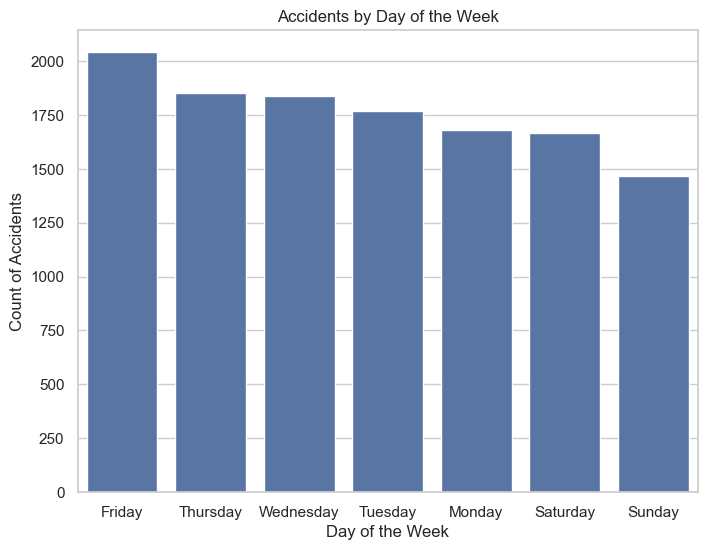

In [105]:
# 3. Day of Week
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Day_of_week', order=data_cleaned['Day_of_week'].value_counts().index)
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Accidents')
plt.show()

### Peak Accident Days:

Fridays see a comparatively higher number of accidents. This trend can be attributed to several factors:

1. **End of the Work Week**: As the work week comes to an end, people may be more fatigued or stressed, leading to decreased attention and slower reaction times while driving.

2. **Increased Traffic Volume**: Fridays often have higher traffic volumes as people commute to and from work, run errands, or travel for weekend plans. More vehicles on the road can increase the likelihood of accidents.

3. **Social Activities**: Many social activities and events are scheduled on Fridays, leading to more people driving in the evening and night. This can include going out for dinner, attending parties, or other gatherings, which may involve alcohol consumption and impaired driving.

4. **Rush Hour**: The evening rush hour on Fridays can be particularly congested as people leave work and head home or to other destinations. The increased congestion can lead to more stop-and-go traffic, which is a common cause of rear-end collisions.

5. **Weather Conditions**: Depending on the season, Fridays may coincide with specific weather patterns that can affect driving conditions. For example, winter Fridays might see more accidents due to snow or ice on the roads.

Understanding these factors can help in planning and implementing measures to reduce the number of accidents on Fridays, such as increased traffic enforcement, public awareness campaigns, and encouraging safe driving practices.

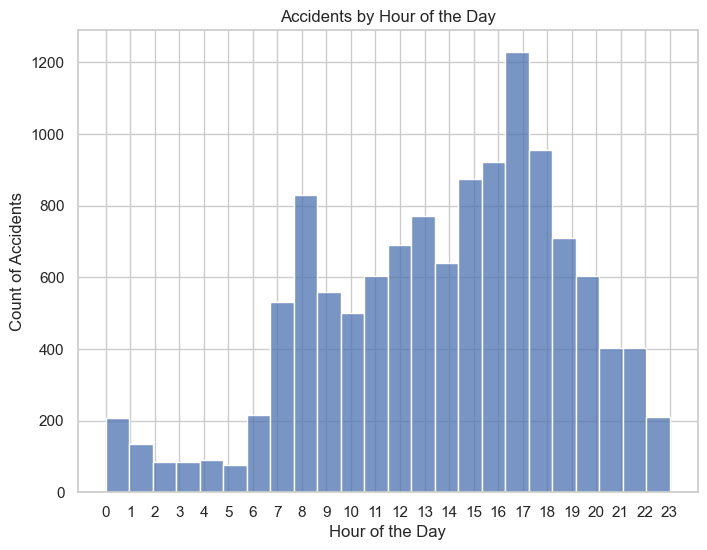

In [106]:

# 8. Time of Accidents
plt.figure(figsize=(8, 6))
data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], errors='coerce').dt.hour  # Extract hour
sns.histplot(data_cleaned['Time'], bins=24, kde=False)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.xticks(range(0, 24))
plt.show()


### Time of Accident:

Accidents show clustering around specific times, particularly during peak traffic hours such as 8 AM, 3 PM, 4 PM, 5 PM, and 6 PM. This underlines the need for traffic management and congestion reduction during these times. 

#### Key Observations:
1. **Morning Rush Hour (8 AM)**: Many accidents occur during the morning rush hour as people commute to work or school. Increased traffic volume and hurried driving can contribute to higher accident rates.
2. **Afternoon and Evening Peaks (3 PM - 6 PM)**: The afternoon and evening hours see another spike in accidents. This can be attributed to:
    - **School Dismissal (3 PM)**: Increased traffic from school buses and parents picking up children.
    - **End of Workday (4 PM - 6 PM)**: The end of the workday leads to a significant increase in traffic as people head home, run errands, or engage in evening activities.

#### Implications for Traffic Management:
- **Enhanced Traffic Control**: Implementing measures such as traffic signal optimization, dedicated turning lanes, and roundabouts can help manage the increased traffic flow during peak hours.
- **Public Awareness Campaigns**: Educating drivers about the risks of peak hour driving and promoting safe driving practices can help reduce accidents.
- **Flexible Work Hours**: Encouraging flexible work hours or remote work can help spread out the traffic load and reduce congestion during peak times.
- **Improved Public Transportation**: Enhancing public transportation options can reduce the number of vehicles on the road during peak hours, thereby decreasing the likelihood of accidents.

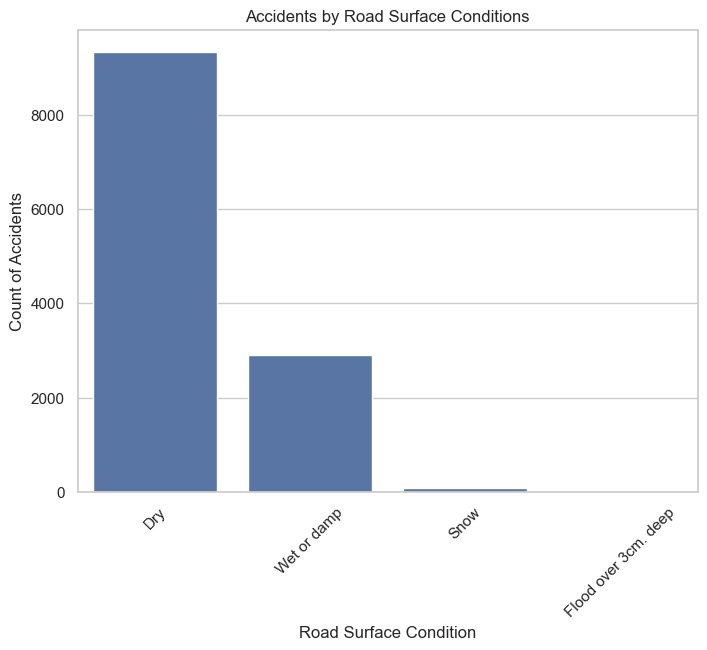

In [107]:
# 4. Road Surface Conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Road_surface_conditions', order=data['Road_surface_conditions'].value_counts().index)
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Condition')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.show()


### Weather Impact:

Accidents predominantly occur under dry weather conditions, debunking the common notion that bad weather is a major contributor to road mishaps. This observation suggests that other factors, such as driver behavior, road conditions, and traffic volume, play a more significant role in accident occurrence than weather conditions alone.

#### Key Observations:
1. **Dry Conditions**: The majority of accidents happen when the weather is dry, indicating that drivers may become complacent and less cautious when they perceive the driving conditions to be safe.
2. **Driver Behavior**: Factors such as speeding, distracted driving, and aggressive driving are likely to contribute more to accidents than adverse weather conditions.
4. **Traffic Volume**: Higher traffic volumes during peak hours can increase the likelihood of accidents, regardless of weather conditions.

#### Implications for Road Safety:
- **Driver Education**: Emphasizing the importance of safe driving practices in all weather conditions can help reduce accidents. This includes promoting defensive driving techniques and awareness of potential hazards.